# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | madingou
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | belmonte
Processing Record 7 of Set 1 | kwangyang
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | mbanza kongo
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | gilleleje
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | kapa'a
Processing Record 18 of Set 1 | urangan
Processing Record 19 of Set 1 | burgstadt
Processing Record 20 of Set 1 | pizarro
Processing Record 21 of Set 1 | waitangi
Processing Rec

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,54.93,75,100,17.83,SH,1725840584
1,madingou,-4.1536,13.5500,77.85,74,46,2.82,CG,1725840585
2,punta arenas,-53.1500,-70.9167,33.91,93,40,19.57,CL,1725840495
3,avarua,-21.2078,-159.7750,78.85,73,40,12.66,CK,1725840587
4,college,64.8569,-147.8028,54.07,82,100,4.61,US,1725840588


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
import os
print(os.getcwd())

c:\Users\TheuriM\BootCamp\Challenges\Python-API-Challenge\WeatherPy


In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,54.93,75,100,17.83,SH,1725840584
1,madingou,-4.1536,13.5500,77.85,74,46,2.82,CG,1725840585
2,punta arenas,-53.1500,-70.9167,33.91,93,40,19.57,CL,1725840495
3,avarua,-21.2078,-159.7750,78.85,73,40,12.66,CK,1725840587
4,college,64.8569,-147.8028,54.07,82,100,4.61,US,1725840588


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

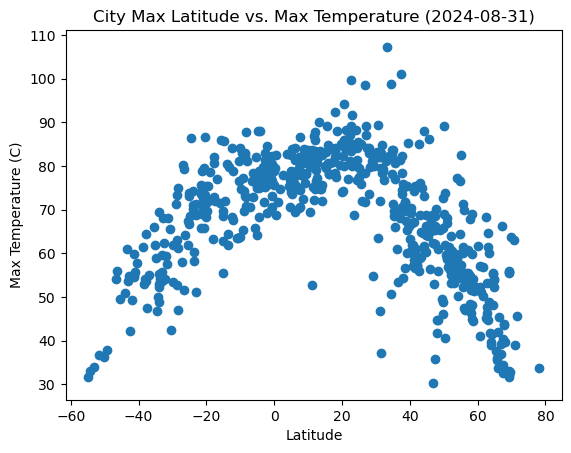

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature (2024-08-31)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

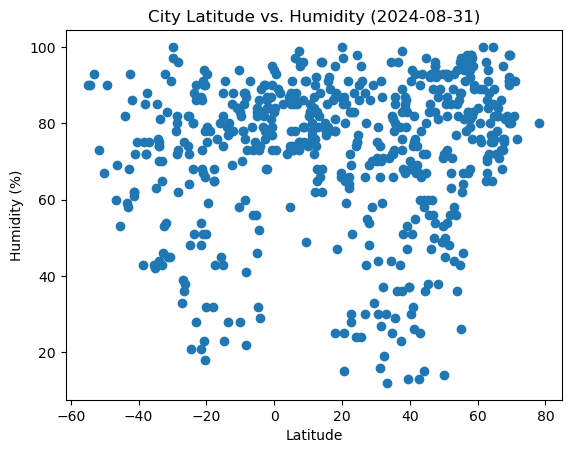

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-31)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

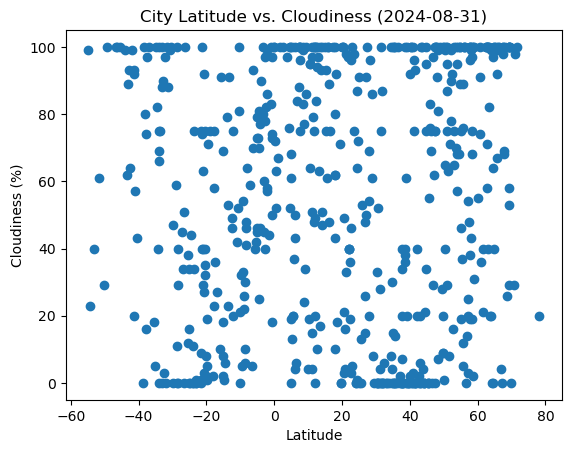

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-31)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

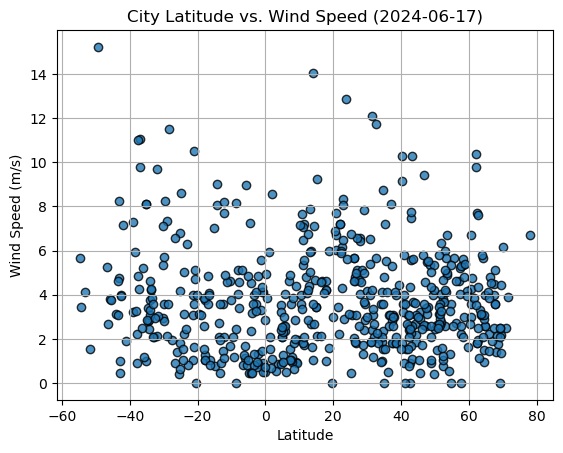

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # Scatter plot creation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
        
    # Annotating the line & labels
    plt.annotate(line_eq,(0,0),fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)

    # Print r value
    (f"The r-value is: {rvalue}")
        
    #Print equation of the line
    print(f"The equation of the regression line is: {line_eq}")


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,college,64.8569,-147.8028,54.07,82,100,4.61,US,1725840588
6,kwangyang,34.9753,127.5892,83.61,72,15,3.42,KR,1725840590
9,ribeira grande,38.5167,-28.7000,71.78,85,36,10.00,PT,1725840594
11,gilleleje,56.1220,12.3106,69.85,81,100,1.99,DK,1725840596
12,iqaluit,63.7506,-68.5145,41.70,80,20,5.75,CA,1725840588


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df =  city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,54.93,75,100,17.83,SH,1725840584
1,madingou,-4.1536,13.5500,77.85,74,46,2.82,CG,1725840585
2,punta arenas,-53.1500,-70.9167,33.91,93,40,19.57,CL,1725840495
3,avarua,-21.2078,-159.7750,78.85,73,40,12.66,CK,1725840587
5,belmonte,-15.8631,-38.8828,71.51,80,10,6.73,BR,1725840589


###  Temperature vs. Latitude Linear Regression Plot

The equation of the regression line is: y = -0.59x + 89.53


Text(0.5, 1.0, 'Northern Hemisphere - Max Temp vs. Latitude')

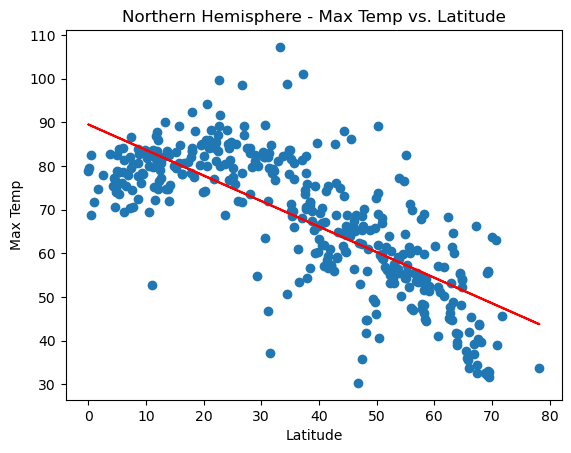

In [37]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], 'Max Temp',(6,30))

plt.title('Northern Hemisphere - Max Temp vs. Latitude')

The equation of the regression line is: y = 0.68x + 81.97


Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs. Latitude')

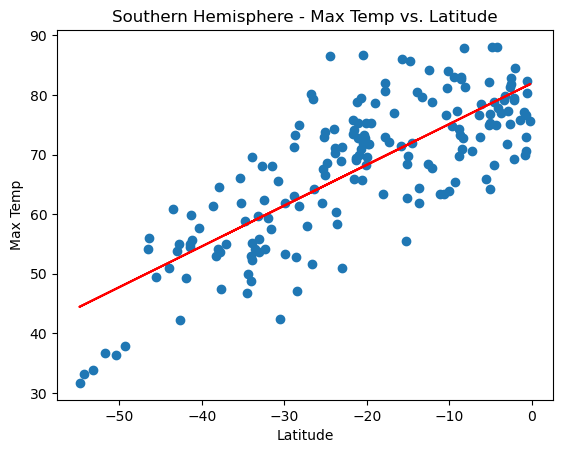

In [38]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], 'Max Temp',(-55,90))


plt.title('Southern Hemisphere - Max Temp vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The temperatures rise as one approaches the equator and fall as one moves towards the North and South poles.

### Humidity vs. Latitude Linear Regression Plot

The equation of the regression line is: y = 0.04x + 72.25


Text(0.5, 1.0, 'Northern Hemisphere - Humidity vs. Latitude')

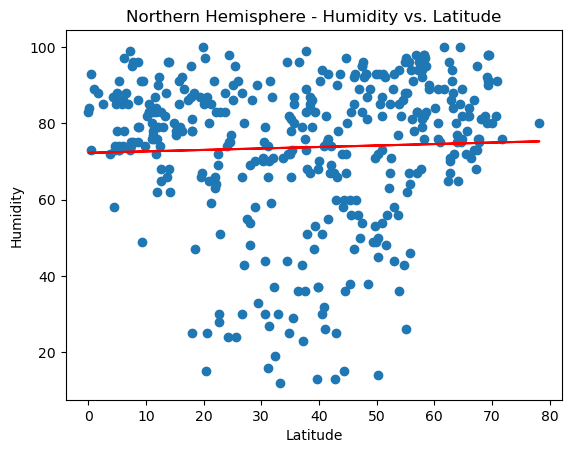

In [39]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], 'Humidity',(40,10))

plt.title('Northern Hemisphere - Humidity vs. Latitude')

The equation of the regression line is: y = 0.11x + 72.11


Text(0.5, 1.0, 'Southern Hemisphere - Humidity vs. Latitude')

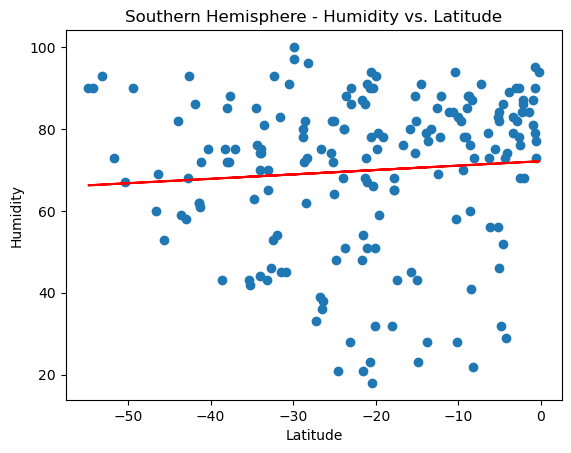

In [40]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], 'Humidity',(-55,20))

plt.title('Southern Hemisphere - Humidity vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Humidity seems to not be affected by location. Other factors but the latitude may influence it.

### Cloudiness vs. Latitude Linear Regression Plot

The equation of the regression line is: y = 0.08x + 52.27


Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness vs. Latitude')

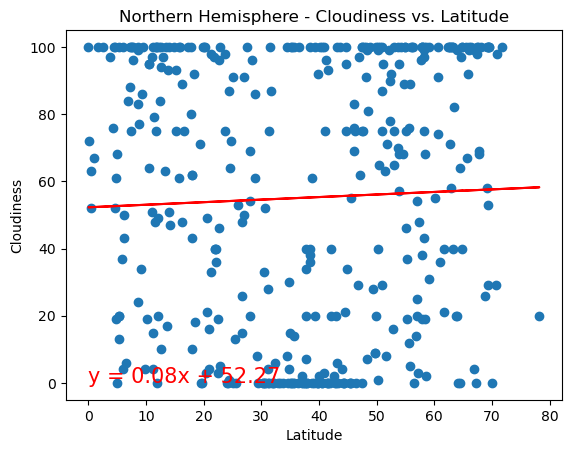

In [41]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness',(40,10))

plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

The equation of the regression line is: y = -0.17x + 46.96


Text(0.5, 1.0, 'Southern Hemisphere - Cloudiness vs. Latitude')

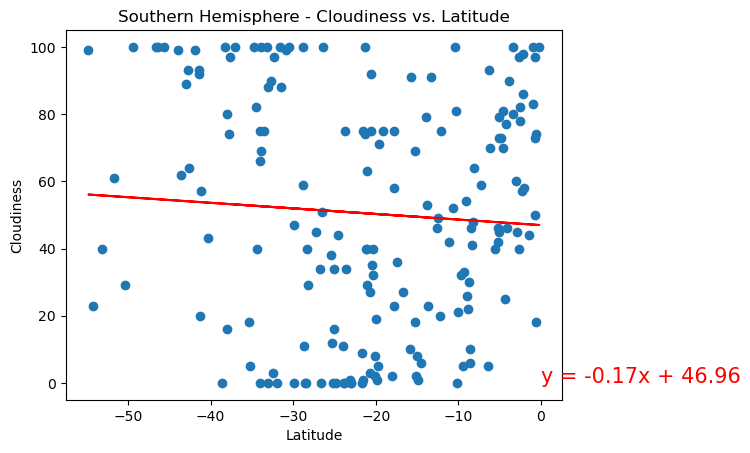

In [44]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], 'Cloudiness',(-55,20))

plt.title('Southern Hemisphere - Cloudiness vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a unform distribution of cloudiness regardless of the distance from the Equator.


### Wind Speed vs. Latitude Linear Regression Plot

The equation of the regression line is: y = 0.01x + 7.08


Text(0.5, 1.0, 'Northern Hemisphere - Wind Speed vs. Latitude')

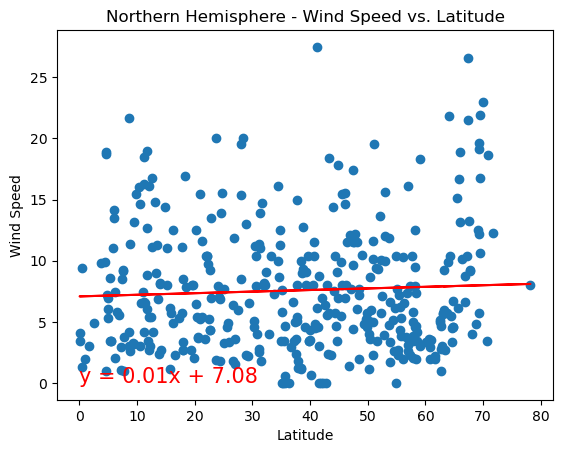

In [45]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], 'Wind Speed',(40,25))

plt.title('Northern Hemisphere - Wind Speed vs. Latitude')

The equation of the regression line is: y = -0.07x + 7.36


Text(0.5, 1.0, 'Southern Hemisphere - Wind Speed vs. Latitude')

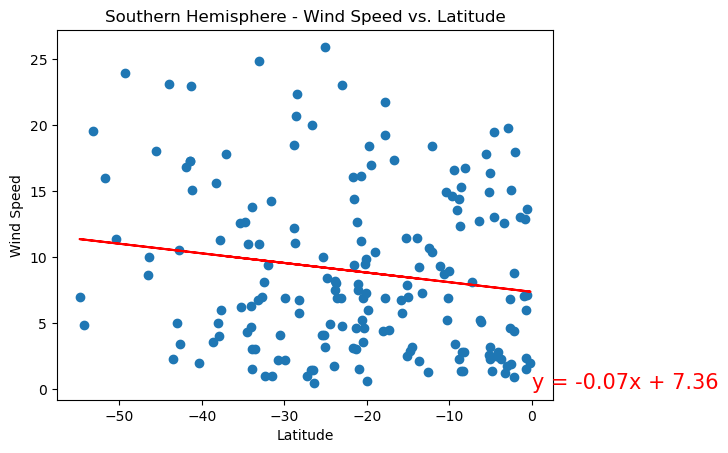

In [46]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], 'Wind Speed',(-55,20))

plt.title('Southern Hemisphere - Wind Speed vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Windspeeds are evenly spread across the all latitudes. There does not seem to be any indication that latitude affects the speeds.